In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [2]:
# Load dataset
df = pd.read_csv('/content/breast-cancer.csv')  # Adjust path for Colab if needed

# Drop the 'id' column
df.drop(['id'], axis=1, inplace=True)

# Encode diagnosis: M = 1 (Malignant), B = 0 (Benign)
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Check for missing values
print("Missing values:\n", df.isnull().sum().sum())


Missing values:
 0


In [3]:
# Use only the first 10 features for 2D visualization
features = df.iloc[:, 1:3]  # e.g., radius_mean and texture_mean for 2D plotting
labels = df['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [4]:
# Linear SVM
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train_scaled, y_train)

# RBF SVM
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train_scaled, y_train)


SVC()

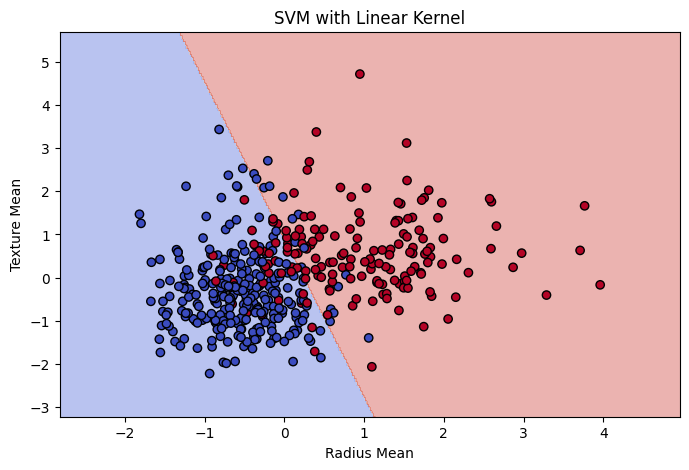

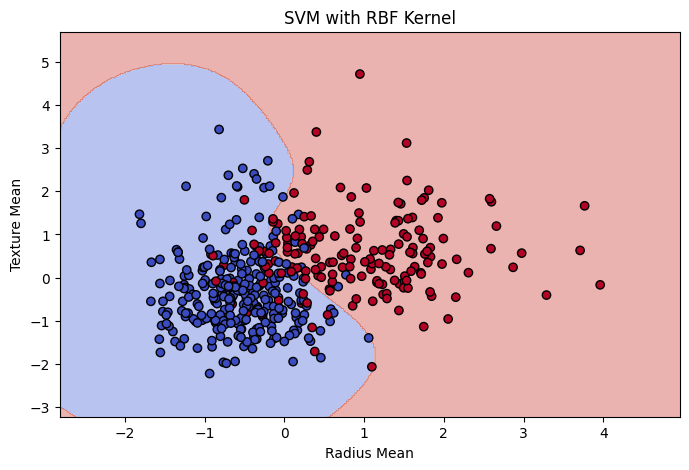

In [5]:
def plot_decision_boundary(model, X, y, title):
    h = .02  # mesh step size
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 5))
    plt.contourf(xx, yy, Z, alpha=0.4, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
    plt.xlabel('Radius Mean')
    plt.ylabel('Texture Mean')
    plt.title(title)
    plt.show()

# Plot for both kernels
plot_decision_boundary(svm_linear, X_train_scaled, y_train, "SVM with Linear Kernel")
plot_decision_boundary(svm_rbf, X_train_scaled, y_train, "SVM with RBF Kernel")


In [6]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf']
}

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=1, cv=5)
grid.fit(X_train_scaled, y_train)

print("Best Parameters:", grid.best_params_)


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Parameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


In [7]:
# Predict and evaluate
y_pred = grid.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.9122807017543859
[[66  5]
 [ 5 38]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        71
           1       0.88      0.88      0.88        43

    accuracy                           0.91       114
   macro avg       0.91      0.91      0.91       114
weighted avg       0.91      0.91      0.91       114



In [8]:
cv_scores = cross_val_score(grid.best_estimator_, scaler.transform(features), labels, cv=5)
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))


Cross-Validation Accuracy Scores: [0.85087719 0.87719298 0.90350877 0.93859649 0.90265487]
Mean CV Accuracy: 0.8945660611706255
